# Data
[wine+quality](https://archive.ics.uci.edu/dataset/186/wine+quality)
  
  Input variables (based on physicochemical tests):
   - 1 - fixed acidity
   - 2 - volatile acidity
   - 3 - citric acid
   - 4 - residual sugar
   - 5 - chlorides
   - 6 - free sulfur dioxide
   - 7 - total sulfur dioxide
   - 8 - density
   - 9 - pH
   - 10 - sulphates
   - 11 - alcohol

Output variable (based on sensory data):
   - 12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

wine_data_url_white = 'gdrive/My Drive/Colab Notebooks/hybrid-intelligent-systems/winequality-white.csv'
wine_data_url_red = 'gdrive/My Drive/Colab Notebooks/hybrid-intelligent-systems/winequality-red.csv'

wine_df_white_raw = pd.read_csv(wine_data_url_white, sep=';')
wine_df_red_raw = pd.read_csv(wine_data_url_red, sep=';')

Mounted at /content/gdrive


In [2]:
from sklearn import preprocessing

col_names = wine_df_white_raw.columns
scaler = preprocessing.MinMaxScaler()

white_normalized_data = scaler.fit_transform(wine_df_white_raw)
red_normalized_data = scaler.fit_transform(wine_df_red_raw)

wine_df_white = pd.DataFrame(white_normalized_data, columns=col_names)
wine_df_red = pd.DataFrame(red_normalized_data, columns=col_names)

Append type to data, 0 for white and 1 for red one. Approach is to score clustering with n_clusters equals two.

Data already has quality parameter which may help us to score clustering with n_clusters equals eleven

In [6]:
wine_df_white['type'] = 0
wine_df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.500000,0
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.500000,0
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.500000,0
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000,0
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,0.500000,0
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,0.333333,0
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,0.500000,0
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,0.666667,0


In [7]:
wine_df_red['type'] = 1
wine_df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4,1
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6,1
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6,1
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4,1


In [8]:
full_df = pd.concat([wine_df_white, wine_df_red])

In [9]:
full_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5,0
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5,0
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5,0
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5,0
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.080000,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4,1
1595,0.115044,0.294521,0.100000,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6,1
1596,0.150442,0.267123,0.130000,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6,1
1597,0.115044,0.359589,0.120000,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4,1


In [30]:
full_df_shuffled = full_df.sample(frac=1)

In [31]:
full_df_shuffled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
848,0.159292,0.356164,0.210000,0.061644,0.115192,0.183099,0.088339,0.500734,0.669291,0.197605,0.215385,0.400000,1
1013,0.230769,0.166667,0.283133,0.168712,0.115727,0.209059,0.466357,0.186813,0.427273,0.325581,0.241935,0.333333,0
4160,0.346154,0.078431,0.180723,0.200920,0.139466,0.108014,0.368910,0.214768,0.163636,0.255814,0.112903,0.666667,0
1800,0.365385,0.215686,0.132530,0.147239,0.118694,0.191638,0.422274,0.182957,0.327273,0.209302,0.209677,0.500000,0
205,0.250000,0.127451,0.301205,0.168712,0.097923,0.149826,0.334107,0.194525,0.390909,0.244186,0.129032,0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,0.288462,0.176471,0.240964,0.105828,0.109792,0.149826,0.394432,0.168113,0.436364,0.313953,0.209677,0.333333,0
3053,0.365385,0.088235,0.216867,0.059816,0.097923,0.083624,0.215777,0.138037,0.336364,0.290698,0.241935,0.333333,0
49,0.088496,0.130137,0.370000,0.034247,0.103506,0.154930,0.318021,0.391336,0.456693,0.149701,0.123077,0.400000,1
1174,0.265487,0.164384,0.310000,0.054795,0.111853,0.352113,0.208481,0.520558,0.566929,0.173653,0.169231,0.600000,1


In [149]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

full_df_x = full_df_shuffled.drop(columns=['quality', 'type'])

clustering = AgglomerativeClustering().fit(full_df_x)
clustering.labels_

array([1, 0, 0, ..., 1, 1, 0])

In [150]:
a = np.array(clustering.labels_)
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 4985, 1: 1512}

So, two clusters

In [151]:
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_mutual_info_score

labels_true = list(full_df['type'].values)
labels_pred = list(clustering.labels_)

print(f'normalized MI: {normalized_mutual_info_score(labels_true, labels_pred)}')
print(f'adjusted MI: {adjusted_mutual_info_score(labels_true, labels_pred)}')

normalized MI: 0.00014957860091286353
adjusted MI: 9.655216514305221e-06


# Custom GridSearch

In [152]:
import gc
gc.collect()

def Custom_GridSearch(estimator, param_grid, scoring, data):
  scores_and_params = [] # pairs (step_score, step_estimator)

  # Cartesian product may be computed by --itertools.product--
  param_names = list(param_grid.keys())
  params_combinations = [(x,) for x in param_grid[param_names[0]]] # lists of params typles [(p1,p2,p3), (p1,p2,p3')...] with initial
  temp_params_combinations = [] # same with above, for service use
  keys_count = len(param_grid)

  for param_key_index in range(1, keys_count): # starts with second, we already have first param tuples as initial
    temp_params_combinations = list(params_combinations) # save
    params_combinations.clear()
    for param_value in param_grid[param_names[param_key_index]]:
      for param_tuple in temp_params_combinations:
        params_combinations.append((*param_tuple, param_value))

  del temp_params_combinations
  gc.collect()

  # now in params_combinations we have Cartesian product of params
  # order of params same with keys order
  params_count = len(param_names)
  for prms_comb in params_combinations:
    step_params = {}
    for param_index in range(0, params_count):
      step_params[param_names[param_index]] = prms_comb[param_index]
    step_estimator = estimator(**step_params)
    step_estimator.fit(data)
    step_score = scoring(data, step_estimator.labels_)
    score = (step_score, step_estimator)
    scores_and_params.append(score)

  return scores_and_params

In [153]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

data = full_df_x

max_clusters = int(len(data) / 2)

params = {
    'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine', None],
    'linkage': ['complete', 'average', 'single'],
    'n_clusters': range(2, 15)
}

In [154]:
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
clustering_gs_result_silhouette = Custom_GridSearch(
    estimator = AgglomerativeClustering,
    param_grid = params,
    scoring = silhouette_score,
    data = data
)

In [155]:
# higher Calinski-Harabasz score relates to a model with better defined clusters
clustering_gs_result_ch = Custom_GridSearch(
    estimator = AgglomerativeClustering,
    param_grid = params,
    scoring = calinski_harabasz_score,
    data = data
)

In [156]:
# Zero is the lowest possible score. Values closer to zero indicate a better partition.
clustering_gs_result_db = Custom_GridSearch(
    estimator = AgglomerativeClustering,
    param_grid = params,
    scoring = davies_bouldin_score,
    data = data
)

# Best estimator selection

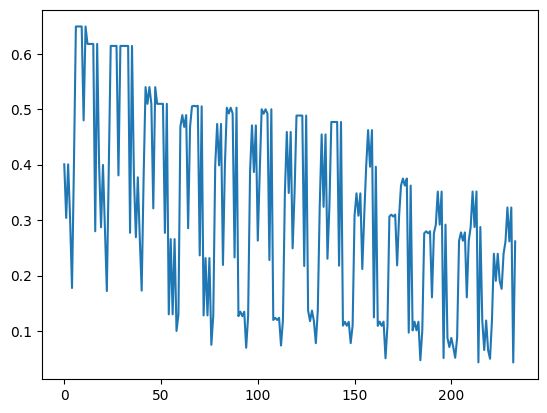

In [157]:
import matplotlib.pyplot as plt

optimization_results_silhouette = [pair[0] for pair in clustering_gs_result_silhouette]
optimization_results_ch = [pair[0] for pair in clustering_gs_result_ch]
optimization_results_db = [pair[0] for pair in clustering_gs_result_db]

plt.plot(list(range(len(optimization_results_silhouette))), optimization_results_silhouette)
plt.show()

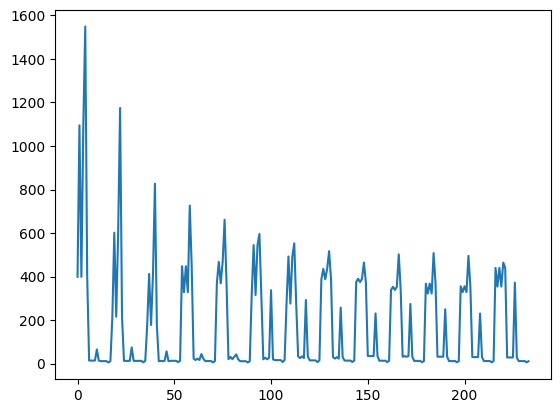

In [158]:
plt.plot(list(range(len(optimization_results_ch))), optimization_results_ch)
plt.show()

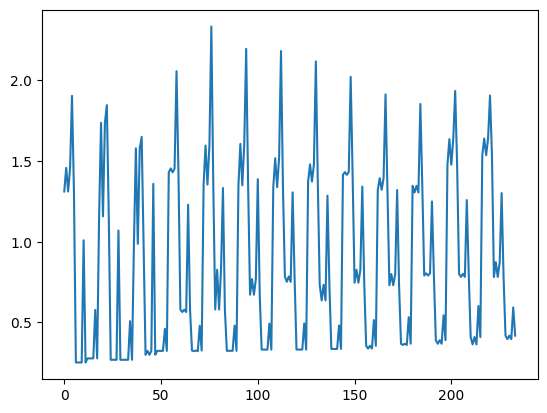

In [159]:
plt.plot(list(range(len(optimization_results_db))), optimization_results_db)
plt.show()

In [160]:
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
optimization_results_sort_silhouette = sorted(clustering_gs_result_silhouette, key=lambda gs: gs[0], reverse=True)
data_silhouette = [[pair[0], pair[1].n_clusters, pair[1].linkage, pair[1].metric] for pair in optimization_results_sort_silhouette]
silhouette_scores_df = pd.DataFrame(data_silhouette, columns=['score','n_clusters','linkage','metric'])

# higher Calinski-Harabasz score relates to a model with better defined clusters
optimization_results_sort_ch = sorted(clustering_gs_result_ch, key=lambda gs: gs[0], reverse=True)
data_ch = [[pair[0], pair[1].n_clusters, pair[1].linkage, pair[1].metric] for pair in optimization_results_sort_ch]
ch_scores_df = pd.DataFrame(data_ch, columns=['score','n_clusters','linkage','metric'])

# Zero is the lowest possible score. Values closer to zero indicate a better partition.
optimization_results_sort_db = sorted(clustering_gs_result_db, key=lambda gs: gs[0], reverse=False)
data_db = [[pair[0], pair[1].n_clusters, pair[1].linkage, pair[1].metric] for pair in optimization_results_sort_db]
db_scores_df = pd.DataFrame(data_db, columns=['score','n_clusters','linkage','metric'])

In [ ]:
db_scores_df

Curious estimators:

silhouette_score

1.   #0-9, has highest score, n_clusters = 2 (assumption: separate clusters for red and white wine)
2.   #90-94 115-117, n_clusters = 11 (assumption: cluster corresponds to wine quality, the output variable in dataset, between - and 10)

calinski_harabasz_score

1.   #0 2 3, has highest score, n_clusters = 2 (assumption: separate clusters for red and white wine)
2.   #15, n_clusters = 11 (assumption: cluster corresponds to wine quality, the output variable in dataset, between - and 10)

davies_bouldin_score

1.   #0-4 15-19, has lowest score, n_clusters = 2 (assumption: separate clusters for red and white wine)
2.   #60 61 66 67 68, n_clusters = 11 (assumption: cluster corresponds to wine quality, the output variable in dataset, between - and 10)





In [173]:
estimators_and_info = [
    ('type', 'silhouette', '0', optimization_results_sort_silhouette[0][1]),
    ('type', 'silhouette', '1', optimization_results_sort_silhouette[1][1]),
    ('type', 'silhouette', '2', optimization_results_sort_silhouette[2][1]),
    ('type', 'silhouette', '3', optimization_results_sort_silhouette[3][1]),
    ('type', 'silhouette', '4', optimization_results_sort_silhouette[4][1]),
    ('type', 'silhouette', '5', optimization_results_sort_silhouette[5][1]),
    ('type', 'silhouette', '6', optimization_results_sort_silhouette[6][1]),
    ('type', 'silhouette', '7', optimization_results_sort_silhouette[7][1]),
    ('type', 'silhouette', '8', optimization_results_sort_silhouette[8][1]),
    ('type', 'silhouette', '9', optimization_results_sort_silhouette[9][1]),
    ('quality', 'silhouette', '90', optimization_results_sort_silhouette[90][1]),
    ('quality', 'silhouette', '91', optimization_results_sort_silhouette[91][1]),
    ('quality', 'silhouette', '92', optimization_results_sort_silhouette[92][1]),
    ('quality', 'silhouette', '93', optimization_results_sort_silhouette[93][1]),
    ('quality', 'silhouette', '94', optimization_results_sort_silhouette[94][1]),
    ('quality', 'silhouette', '115', optimization_results_sort_silhouette[115][1]),
    ('quality', 'silhouette', '116', optimization_results_sort_silhouette[116][1]),
    ('quality', 'silhouette', '117', optimization_results_sort_silhouette[117][1]),

    ('type', 'calinski_harabasz', '0', optimization_results_sort_ch[0][1]),
    ('type', 'calinski_harabasz', '2', optimization_results_sort_ch[2][1]),
    ('type', 'calinski_harabasz', '3', optimization_results_sort_ch[3][1]),
    ('quality', 'calinski_harabasz', '15', optimization_results_sort_ch[15][1]),

    ('type', 'davies_bouldin', '0', optimization_results_sort_db[0][1]),
    ('type', 'davies_bouldin', '1', optimization_results_sort_db[1][1]),
    ('type', 'davies_bouldin', '2', optimization_results_sort_db[2][1]),
    ('type', 'davies_bouldin', '3', optimization_results_sort_db[3][1]),
    ('type', 'davies_bouldin', '4', optimization_results_sort_db[4][1]),
    ('type', 'davies_bouldin', '15', optimization_results_sort_db[15][1]),
    ('type', 'davies_bouldin', '19', optimization_results_sort_db[19][1]),
    ('quality', 'davies_bouldin', '60', optimization_results_sort_db[60][1]),
    ('quality', 'davies_bouldin', '61', optimization_results_sort_db[61][1]),
    ('quality', 'davies_bouldin', '66', optimization_results_sort_db[66][1]),
    ('quality', 'davies_bouldin', '67', optimization_results_sort_db[67][1]),
    ('quality', 'davies_bouldin', '68', optimization_results_sort_db[68][1]),
]

In [ ]:
true_clustering_labels_quality = list(full_df['quality'].values)
true_clustering_labels_type = list(full_df['type'].values)

MI_scores_columns = ['score NMI', 'score AMI', 'target variable', 'clustering learn metric', 'estimator index', 'labels dict']

MI_data = []

for target, scoring, estimator_index, estimator in estimators_and_info:
  NMI = 0
  AMI = 0
  if target == 'type':
    NMI = normalized_mutual_info_score(true_clustering_labels_type, estimator.labels_)
    AMI = adjusted_mutual_info_score(true_clustering_labels_type, estimator.labels_)
  elif target == 'quality':
    NMI = normalized_mutual_info_score(true_clustering_labels_quality, estimator.labels_)
    AMI = adjusted_mutual_info_score(true_clustering_labels_quality, estimator.labels_)
  MI_data.append([NMI, AMI, target, scoring, estimator_index, dict(Counter(estimator.labels_))])

MI_df = pd.DataFrame(MI_data, columns=MI_scores_columns)

In [198]:
MI_df

,score NMI,score AMI,target variable,clustering learn metric,estimator index,labels dict
0,0.000155,-0.000152,type,silhouette,0,"{0: 6496, 1: 1}"
1,0.000155,-0.000152,type,silhouette,1,"{0: 6496, 1: 1}"
2,0.000155,-0.000152,type,silhouette,2,"{0: 6496, 1: 1}"
3,0.000155,-0.000152,type,silhouette,3,"{0: 6496, 1: 1}"
4,0.000155,-0.000152,type,silhouette,4,"{0: 6496, 1: 1}"
5,0.000771,0.000465,type,silhouette,5,"{0: 6496, 1: 1}"
6,0.000771,0.000465,type,silhouette,6,"{0: 6496, 1: 1}"
7,0.000771,0.000465,type,silhouette,7,"{0: 6496, 1: 1}"
8,0.000771,0.000465,type,silhouette,8,"{0: 6496, 1: 1}"
9,0.000771,0.000465,type,silhouette,9,"{0: 6496, 1: 1}"


Reults where 1 cluster has over 6k objects are fake

In [230]:
# lets work with calinski_harabasz №15

"""
index	| score NMI	| score AMI	| target variable	| clustering learn metric |	estimator index	| labels dict
20	  | 0.00036	  | 0.00019	  | type	          | calinski_harabasz	      | 3	              | {1: 5830, 0: 667}
21	  | 0.00405	  | -0.00011	| quality	        | calinski_harabasz	      | 15	            | {10: 421, 8: 537, 4: 1570, 2: 1571, 5: 1365, 0: 605, 7: 22, 1: 131, 6: 128, 3: 137, 9: 10}
"""

best_estimator = optimization_results_sort_ch[15][1]

print(f'n_clusters: {best_estimator.n_clusters}')
print(f'linkage: {best_estimator.linkage}')
print(f'metric: {best_estimator.metric}')

n_clusters: 11
linkage: complete
metric: cosine


In [211]:
print(f'{dict(Counter(best_estimator.labels_))}')

{10: 421, 8: 537, 4: 1570, 2: 1571, 5: 1365, 0: 605, 7: 22, 1: 131, 6: 128, 3: 137, 9: 10}


In [212]:
dict(Counter(true_clustering_labels_quality))

{0.5: 2198,
 0.33333333333333326: 1457,
 0.6666666666666665: 880,
 0.8333333333333333: 175,
 0.16666666666666663: 163,
 0.0: 30,
 1.0: 23,
 0.3999999999999999: 681,
 0.6000000000000001: 638,
 0.8: 199,
 0.19999999999999996: 53}

In [213]:
dict(Counter(true_clustering_labels_type))

{0: 4898, 1: 1599}

# Best estimator visualization

In [214]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt

In [215]:
_dendrogram = linkage(data, method='complete', metric='cosine')

In [218]:
cutree = cut_tree(_dendrogram, n_clusters=11)

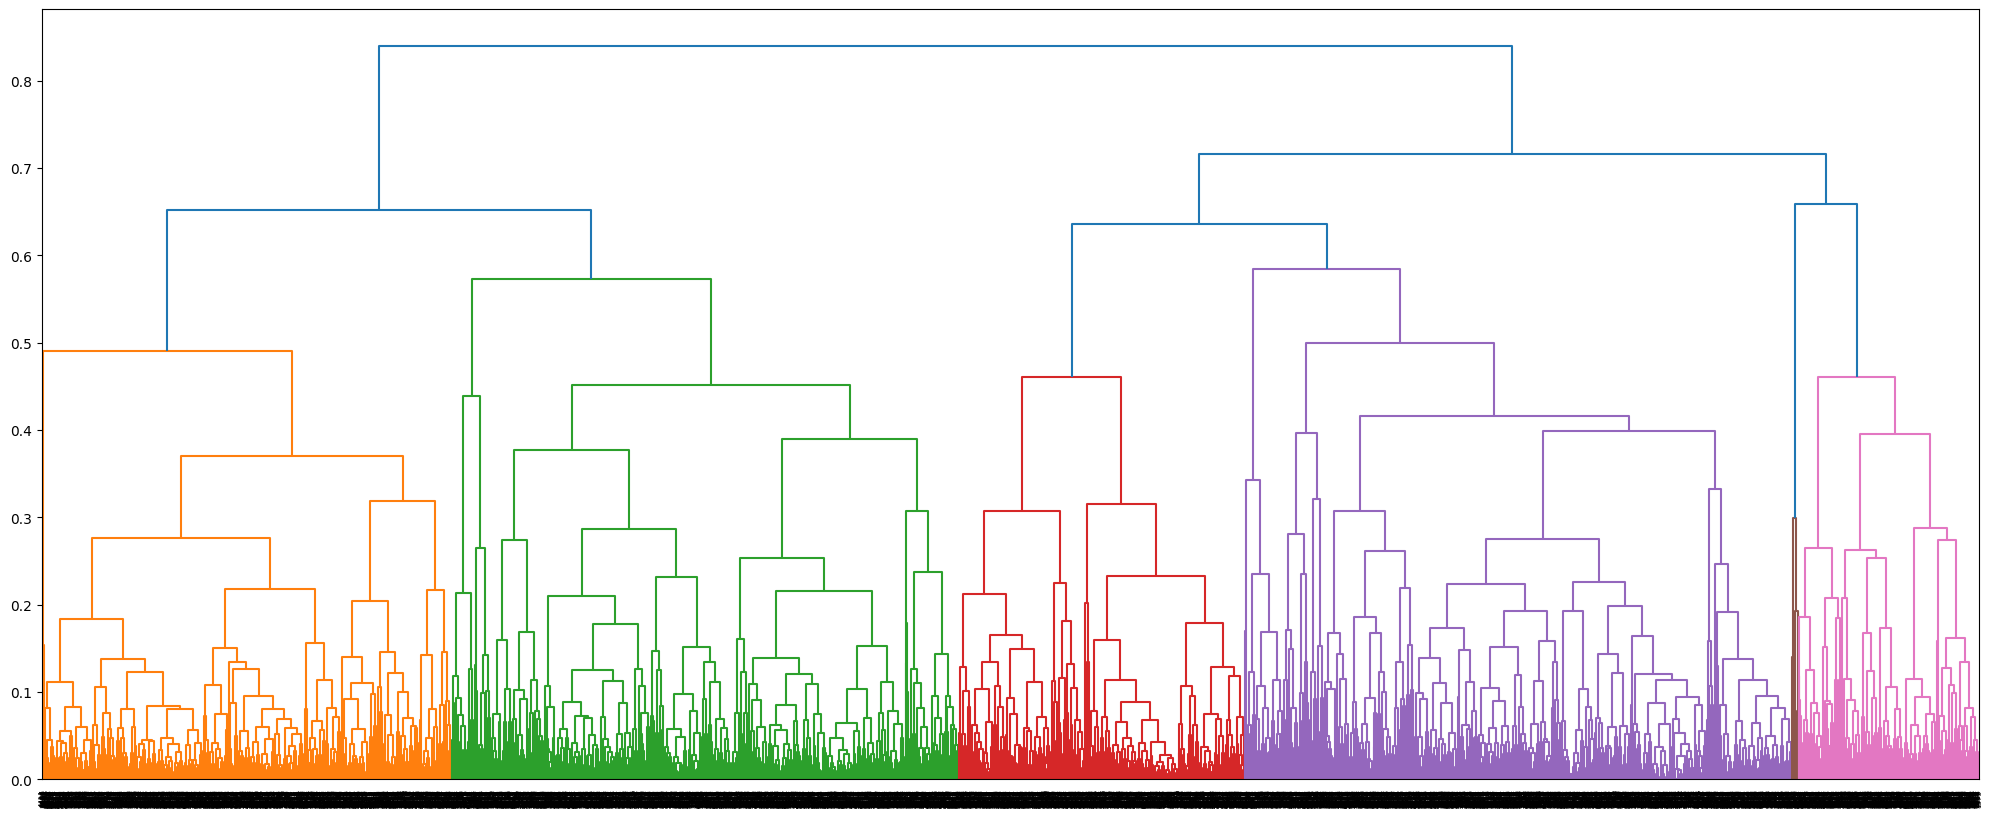

In [219]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(_dendrogram)
plt.show()

In [222]:
from collections import Counter

sorted(dict(Counter(best_estimator.labels_)).items(), key=lambda x:x[1])

[(9, 10),
 (7, 22),
 (6, 128),
 (1, 131),
 (3, 137),
 (10, 421),
 (8, 537),
 (0, 605),
 (5, 1365),
 (4, 1570),
 (2, 1571)]

In [223]:
sorted(dict(Counter(full_df['type'].values)).items(), key=lambda x:x[1])

[(1, 1599), (0, 4898)]

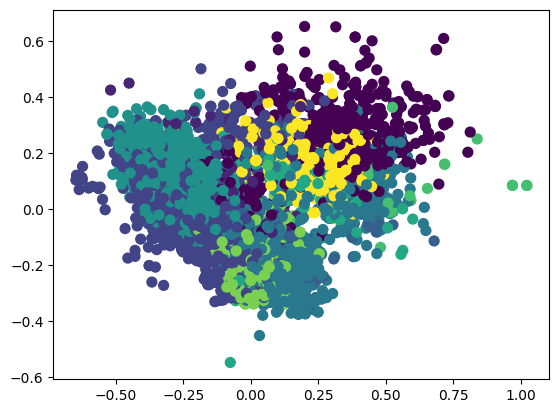

In [224]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.scatter(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    c=best_estimator.labels_,
    s=50
);

# ontology
[docs](https://owlready2.readthedocs.io/en/v0.42/class.html#querying-individual-relations)

In [225]:
best_estimator.children_

array([[ 2785,  4971],
       [  995,  5091],
       [  373,  5064],
       ...,
       [12964, 12982],
       [12988, 12990],
       [12989, 12991]])

In [226]:
!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 57.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.45-cp310-cp310-linux_x86_64.whl size=24077393 sha256=9812c44a6c9752c5a6e0347a1aeeb2f2d88ddaaab4971d2d9ff909dad057612c
  Stored in directory: /root/.cache/pip/wheels/5c/f4/9d/249b1671d391e3feddd443c7d0eb79a732afabc9f370591271
Successfully built owlready2


In [227]:
from owlready2 import *
import types

In [228]:
onto = get_ontology("http://itmo.ru/his2.okladnikov.owl")
n_samples = len(data)
with onto:
    for i, pair in enumerate(best_estimator.children_):
        # parent
        parent = f'Class_{i+n_samples}'
        parent_ontology_entity = ''
        if not onto[parent]:
            parent_ontology_entity = types.new_class(parent, (Thing,))
        else:
            parent_ontology_entity = onto[parent]
        # child
        for child_idx in pair:
            cls, individ = f'Class_{child_idx}', f'Individ_{child_idx}'
            if child_idx >= n_samples:
                cls_ontology_entity = onto[cls]
                if not cls_ontology_entity:
                    types.new_class(cls, (parent_ontology_entity,))
                else:
                    cls_ontology_entity.is_a.append(parent_ontology_entity)
                    cls_ontology_entity.is_a.remove(Thing)
            else:
                parent_ontology_entity(individ)

onto.save(file = "gdrive/My Drive/Colab Notebooks/hybrid-intelligent-systems/onto.owl", format = "ntriples")

In [229]:
onto.destroy()